# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, all three needed data were gathered.
1. Direct download of the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) from the Classroom (pandas read_csv was used to read the data.
2. Using the Requests library and the image data link available in the classroom, the image-predictions data was download and saved as .tsv file.
3. The third dataset requires having a twitter API access/tokens but then due to the difficult in getting the needed API, the .json file link made available in the classroom was read and download using the Requests library.

In [1]:
#let us import all neccessary dependecies or libraries we will need for the project
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

### First Dataset

>1. This dataset was downloaded manually as it was provided

In [2]:
#lets read this dataset using pandas .read_csv which is used to read comma seperated value (csv) files
tweet_df = pd.read_csv("twitter-archive-enhanced.csv")

### Second Dataset

>2. Used the Requests library to download the tweet image prediction (image_predictions.tsv) using the link as provided in the classroom


In [ ]:
#using request.get method to get out dataset from the URL and also, using the "write binary (wb)" mode 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
images = requests.get(url)
with open("image-predictions.tsv",  mode = 'wb') as file:
    file.write(images.content)

In [3]:
pred_df = pd.read_csv('image-predictions.tsv', sep='\t')

### Third Dataset

>3. The Tweepy library is to be used to query additional data via the Twitter API (tweet_json.txt) but since getting the neccessary login details from Twitter is not forthcoming, a link was provided in the classroom and was used here to download this data

Below steps are to be used if I was using the twitter API via tweepy

In [ ]:
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [ ]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [ ]:
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
#The df_1 here should and must be the first dataset name (saved) for this project
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

The above code used to query data from twitter API using tweepy will not work on this project simply because we do not have twitter developer account. It will keep showing `Fail` and not `Success`.

> The code below enables non holders of twitter developer account to query and gather same dataset but by using the `request` library.

In [ ]:
#lets get the .json data from the URL
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
tweet = requests.get(url)
with open("tweet-json.txt",  mode = 'wb') as file:
    file.write(tweet.content)

In [4]:
#An empty list was created and the .json data read into the list and convereted to a DataFrame 
dt = []

for line in (open('tweet-json.txt','rb')):
    tweet_data = json.loads(line)
    tweet_dict = {'tweet_id':tweet_data['id'],
                  'favorite_count':tweet_data['favorite_count'],
                  'retweet_count':tweet_data['retweet_count'],
                  }
    dt.append(tweet_dict)
text_df = pd.DataFrame(dt)

## Assessing Data
In this section, I detect and document **eight (8) quality issues and two (2) tidiness issue**. 

I used **both** visual assessment (Excel, PowerBi and pandas) and programmatic assessement to assess the data.


### Visual Assessment




In [5]:
#lets see the entire data from our first dataset
tweet_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


The above output shows us what the first dataset looks like. You can see that the `name` column has **Alphabet** or **Stopword** as a name.

In [6]:
#lets read and visualise the second dataset
pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
pred_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


The above codes output the last five rows from out second dataset and if you visualize carefully, you will see that column *p1* has predicted orange on the last row. This shows that our data does not have only dog uploads.

In [8]:
#lets read and visulise the third dataset
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Programmatic Assessment

In [9]:
#lets check the entire information contained in our first dataset
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

The above programmatic code shows that we have about six columns that all have missing values and also, a column with a wrong data type.The `.info` in pandas is used to output or show informations about our dataset

In [10]:
#lets check our first dataset to see if their are missing values
tweet_df.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

`isna` which means *(is not avaible)* in a layman terms was used to clearly confirm what information we received when we ran `.info` earlier

In [11]:
#lets see the satistical values of our first dataset
tweet_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
#lets check the entire information contained in our second dataset
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
#lets check the entire information contained in our second dataset
pred_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [14]:
#lets check the entire information contained in our third dataset
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [15]:
text_df.head(2)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514


### Quality issues
#### `tweet_df` table
1. Timestamp is object data type instead of datetime data type

2. Some columns like [in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls] all have missing values. We will remove the NAN on rows and also on column because we will not be needing the columns.

3. Some Dog names are actually not Dog names but **Alphabets, stopwords** all recorded with small letters

4. Some Dogs names are having **None** as a value, that needs to change to NAN

5. The rating denominator has values greater or less than 10

6. Some dog stages are have None values

#### `pred_df` table
7. There are some predicted images that are not dogs (since we are particular about dogs, we will drop them)

8. Inconsistent spelling of predicted dog breed (mixture of upper and lower case)


 

### Tidiness issues
1. tweet_df should have all dog stages as one column

2. timestamp should be broken into date, month and day

3. The three datasets all share one particular column and so, we will merge all datasets to produce a master data

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [16]:
# Make copies of original pieces of data
df_tweet = tweet_df.copy()
df_pred = pred_df.copy()
df_text = text_df.copy()

### Quality Issue: Data type
`df_tweet` has a column named timestap with an object type which needs to be changed to a datetime

#### Define: 

Timestamp is having an object data type, it has to be changed to a datetime data type using pd.to_datetime()

#### Code

In [17]:
df_tweet['timestamp'] = pd.to_datetime(df_tweet['timestamp'])

#### Test

In [18]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Quality Issue: Missing values
`df_tweet` has some columns with missing values

#### Define
The rows of columns na with missing values have to be dropped as the values cannot be guessed or intuitively captured

#### Code

In [19]:
#lets remove the rows with missing values 
df_tweet.dropna()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Test

In [20]:
df_tweet.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

#### Define
The rows with missing values have been dropped and so, it is paramount to drop the cloumns too

In [21]:
df_tweet.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 
               'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1, inplace=True)

#### Test


In [22]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   rating_numerator    2356 non-null   int64              
 5   rating_denominator  2356 non-null   int64              
 6   name                2356 non-null   object             
 7   doggo               2356 non-null   object             
 8   floofer             2356 non-null   object             
 9   pupper              2356 non-null   object             
 10  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 202.6+ KB


### Quality Issue: Incorrect Dog names

#### Define
some Dog names are alphabet and stop words. Since they are all in lower characters, we will use a for loop 

#### Code

In [23]:
names= df_tweet['name'].values
for i in names:
    if i.islower():
        df_tweet.replace(i, 'No name',inplace=True)

#### Test

In [24]:
df_tweet['name'].values

array(['Phineas', 'Tilly', 'Archie', ..., 'No name', 'No name', 'None'],
      dtype=object)

### Quality Issue: Dogs names having None inplace of NAN

#### Define
Using replace function, we will replace the None values with NAN

#### Code

In [25]:
for value in df_tweet['name'].values:
    df_tweet['name'].replace(to_replace='None' , value = np.nan,inplace = True)

#### Test

In [26]:
df_tweet['name'].value_counts()

No name       109
Charlie        12
Lucy           11
Cooper         11
Oliver         11
             ... 
Devón           1
Gert            1
Dex             1
Ace             1
Christoper      1
Name: name, Length: 932, dtype: int64

### Quality Issue: Rating Denominator has values that are greater or less than 10

#### Define
Change all the values greater or less than 10 to 10.

#### Code

In [27]:
less_ten = df_tweet.query("rating_denominator != 10")['rating_denominator'].index

In [28]:
for index in less_ten:
    df_tweet.at[index,'rating_denominator'] = 10

#### Test

In [29]:
df_tweet.query("rating_denominator != 10")

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality Issue: Dog stages having None

#### Define
Some dog stages are having **None** values and that needs to change

#### Code

In [30]:
name = ['doggo', 'floofer', 'pupper', 'puppo']

for i in name:
    df_tweet[i].replace("None", '', inplace=True)

#### Test

In [31]:
df_tweet.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,,,
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,,,,
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,,,


### Quality Issue: Drop predicted images that are not Dogs

#### Define
Drop the images that are not Dogs using the drop method

#### Code

In [32]:
pred_not_dogs = df_pred.query('p1_dog==False and p2_dog==False and p3_dog==False').index


In [33]:
df_pred.drop(pred_not_dogs, inplace=True)

#### Test

In [34]:
 df_pred.query('p1_dog==False and p2_dog==False and p3_dog==False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Quality Issue: Inconsistent spelling of predicted dog breed

#### Define
Capitalise the predicted names of all dog breed to have same name format

#### Code

In [35]:
df_pred.p1 = df_pred.p1.str.title()
df_pred.p2 = df_pred.p2.str.title()
df_pred.p3 = df_pred.p3.str.title()

#### Test

In [36]:
df_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Tidiness Issue: All dogs stages should be in one column

#### Define
Use the melt function to put all stages in one column

#### Code

In [37]:
df_tweet['stages'] = df_tweet['doggo']+df_tweet['floofer']+df_tweet['pupper']+df_tweet['puppo']


In [38]:
df_tweet.stages.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

The above code shows that some dogs are having multiple stages. It is either i split them seperately but as one value or I give precedence to the last value name. But in this case, I choose to leave it.

In [39]:
df_tweet['stages'].replace('', np.nan, inplace=True)

#### Test

In [40]:
df_tweet['stages'].value_counts()

pupper          245
doggo            83
puppo            29
doggopupper      12
floofer           9
doggopuppo        1
doggofloofer      1
Name: stages, dtype: int64

In [41]:
len(df_tweet['stages'])

2356

### Tidiness Issue: timestamp should be broken to year, month and day

#### Define
Use the dt.year, month and day to create a new column

#### Code

In [42]:
df_tweet['year'] = df_tweet['timestamp'].dt.year
df_tweet['month'] = df_tweet['timestamp'].dt.month_name()
df_tweet['day'] = df_tweet['timestamp'].dt.day_name()

#### Test

In [43]:
df_tweet.sample(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stages,year,month,day
983,749395845976588288,2016-07-03 00:14:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is George. He just remembered that bees a...,10,10,George,,,,,NaN,2016,July,Sunday
2348,666055525042405380,2015-11-16 00:49:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,10,10,No name,,,,,NaN,2015,November,Monday
1903,674638615994089473,2015-12-09 17:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is fed up with being tickled. 12/1...,12,10,NaN,,,pupper,,pupper,2015,December,Wednesday


### Tidiness Issue: merge all three datasets to a one master data

#### Define

First, we will merge the `df_tweet` dataset with `df_text` dataset but before we do that, we will drop the final set of columns that aren't required in our master data.

#### Code

In [44]:
df_tweet.drop(['timestamp','source','text','doggo','floofer','pupper','puppo'], axis=1, inplace=True)

In [45]:
df_pred.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True


In [46]:
df_pred.drop('jpg_url', axis=1, inplace=True)

In [47]:
df = pd.merge(df_tweet, df_text, on='tweet_id', how='inner')

#### Test

In [48]:
df.head(3)

,tweet_id,rating_numerator,rating_denominator,name,stages,year,month,day,favorite_count,retweet_count
0,892420643555336193,13,10,Phineas,NaN,2017,August,Tuesday,39467,8853
1,892177421306343426,13,10,Tilly,NaN,2017,August,Tuesday,33819,6514
2,891815181378084864,12,10,Archie,NaN,2017,July,Monday,25461,4328


#### Define

Since we have merged the `df_tweet` and `df_text` as a single dataset, to get a master dataset, we need to merge `df_pred` to the previously marged data.

#### Code

In [49]:
total_merged = pd.merge(df, df_pred, on='tweet_id', how='inner')

#### Test

In [50]:
total_merged.duplicated().sum()

0

In [51]:
total_merged.head(3)

,tweet_id,rating_numerator,rating_denominator,name,stages,year,month,day,favorite_count,retweet_count,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,13,10,Tilly,NaN,2017,August,Tuesday,33819,6514,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
1,891815181378084864,12,10,Archie,NaN,2017,July,Monday,25461,4328,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2,891689557279858688,13,10,Darla,NaN,2017,July,Sunday,42908,8964,1,Paper_Towel,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [52]:
total_merged.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, I am going to analyze and visualize the wrangled data. 

Below are **three (3) insights and one (1) visualization.** made using the wrangled data

In [53]:
marged_dt = pd.read_csv('twitter_archive_master.csv')

### Insights:
1.Among the three predictions made by the algorithm, which of the predicting model predicted the **Golden_Retriever** dog type the most?

2.Which dog stages has highest retweeted count?

3.What month has the highest dog stages?

#### Insights 1
Among the three predictions made by the algorithm, which of the predicting model predicted the **Golden_Retriever** dog type the most?

In [54]:
p1_predictions = marged_dt.groupby('p1')[['p1_conf']].count()
p1_predictions.sort_values(by = 'p1_conf', ascending=False).head(5)


,p1_conf
p1,
Golden_Retriever,150
Labrador_Retriever,100
Pembroke,88
Chihuahua,83
Pug,57


In [55]:
p2_predictions = marged_dt.groupby('p2')[['p2_conf']].count()
p2_predictions.sort_values(by = 'p2_conf', ascending=False).head(5)


,p2_conf
p2,
Labrador_Retriever,104
Golden_Retriever,92
Cardigan,73
Chihuahua,44
Pomeranian,42


In [56]:
p3_predictions = marged_dt.groupby('p3')[['p3_conf']].count()
p3_predictions.sort_values(by = 'p3_conf', ascending=False).head(5)


,p3_conf
p3,
Labrador_Retriever,79
Chihuahua,58
Golden_Retriever,48
Eskimo_Dog,38
Kelpie,35


From the above outputs, you will see that p1 has the highest outcome of a predicted dog type (**Golden_Retriever**)

#### Insights 2
Which Dog name has the highest retweeted count?

In [57]:
dog_retweet = marged_dt.groupby('stages')[['retweet_count']].count()
dog_retweet.sort_values(by = 'retweet_count', ascending = False).head()

,retweet_count
stages,
pupper,172
doggo,57
puppo,22
doggopupper,10
floofer,7


From the above output, you can see that the pupper stage has the highest retweeted count

#### Insights 3
What month has the highest dog stages?

In [58]:
highest_month = marged_dt.groupby('month')[['stages']].count()
highest_month.sort_values(by = 'stages', ascending=False)

,stages
month,
December,59
January,50
February,33
July,28
June,22
May,19
March,17
April,13
November,10


The above output shows that the month of December has the highest stages for dog recorded.

### Visualization

In [59]:
import seaborn as sns
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'




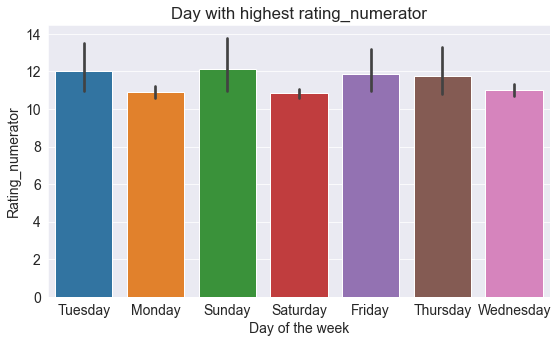

In [60]:
sns.barplot(x="day", y="rating_numerator", data=marged_dt)
plt.title('Day with highest rating_numerator')
plt.xlabel('Day of the week')
plt.ylabel('Rating_numerator')
plt.savefig("visual.png")
plt.show()

from the above graph, it shows that sunday has the highest average rating_numerator from the tweets made